**Finding K Optimal Value**

Dataset link : https://raw.githubusercontent.com/VijayShanmugan/Datasets/main/insurance_m.csv

In [129]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [131]:
df = pd.read_csv('https://raw.githubusercontent.com/VijayShanmugan/Datasets/main/insurance_m.csv')
df.head()

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,1
1,18,1,33.770,1,0,0
2,28,1,33.000,3,0,3
3,33,1,22.705,0,0,2
4,32,1,28.880,0,0,2


In [132]:
df.columns, df.shape

(Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region'], dtype='object'),
 (1338, 6))

In [133]:
df['region'].value_counts()

0    363
3    325
2    325
1    325
Name: region, dtype: int64

In [134]:
X = df.drop(['region'], axis = 1)
X.head()

,age,sex,bmi,children,smoker
0,19,0,27.900,0,1
1,18,1,33.770,1,0
2,28,1,33.000,3,0
3,33,1,22.705,0,0
4,32,1,28.880,0,0


In [135]:
y = df['region']
y.head()

0    1
1    0
2    3
3    2
4    2
Name: region, dtype: int64

In [136]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))

In [137]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (1070, 5) (1070,)
Test set: (268, 5) (268,)


In [148]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
k = 10
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
Pred_y = neigh.predict(X_test)

In [150]:
print("Accuracy of model at K=10 is",metrics.accuracy_score(y_test, Pred_y))

Accuracy of model at K=10 is 0.26492537313432835


In [140]:
Pred_y

array([2, 0, 1, 0, 1, 2, 0, 3, 0, 0, 3, 3, 0, 0, 0, 1, 2, 2, 1, 0, 0, 0,
       0, 1, 1, 2, 0, 0, 2, 1, 2, 2, 3, 1, 1, 3, 1, 2, 2, 0, 3, 0, 0, 0,
       2, 3, 1, 3, 1, 1, 1, 2, 1, 1, 2, 0, 3, 3, 2, 0, 2, 3, 0, 1, 2, 3,
       3, 0, 3, 2, 1, 2, 0, 3, 1, 1, 1, 0, 0, 1, 3, 1, 0, 2, 0, 2, 1, 3,
       0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 0, 2, 2, 0, 3, 0, 0, 0, 3, 2,
       3, 0, 0, 0, 3, 3, 0, 0, 0, 3, 3, 0, 2, 0, 1, 2, 2, 2, 0, 3, 2, 2,
       3, 2, 0, 3, 0, 0, 1, 2, 0, 1, 1, 2, 0, 2, 0, 1, 0, 3, 0, 0, 0, 0,
       0, 3, 0, 3, 0, 0, 2, 1, 2, 0, 0, 0, 1, 3, 0, 1, 0, 3, 3, 2, 3, 2,
       0, 2, 3, 0, 0, 1, 2, 0, 1, 2, 1, 3, 0, 0, 0, 2, 2, 2, 2, 2, 0, 0,
       1, 1, 0, 0, 1, 0, 3, 3, 3, 0, 2, 0, 1, 0, 3, 0, 0, 3, 0, 1, 3, 0,
       0, 2, 1, 0, 0, 2, 1, 0, 2, 1, 2, 1, 2, 3, 1, 0, 1, 2, 0, 0, 2, 2,
       0, 2, 0, 2, 1, 2, 1, 2, 3, 2, 0, 3, 1, 0, 0, 3, 0, 1, 0, 1, 3, 0,
       2, 3, 1, 1])

Minimum error:- 0.6716417910447762 at K = 26


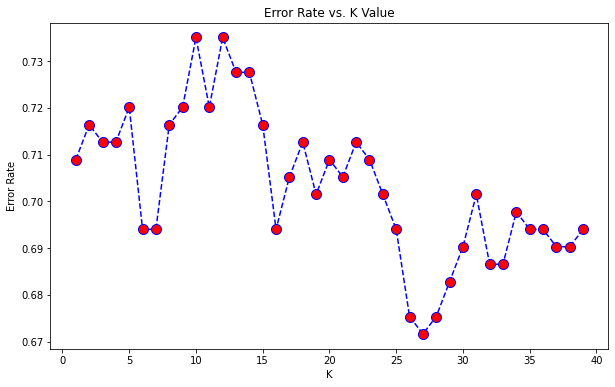

In [141]:
error_rate = []
for i in range(1,40): 
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

In [142]:
acc = []
from sklearn import metrics
for i in range(1,40):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    yhat = neigh.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, yhat))

Maximum accuracy:- 0.3283582089552239 at K = 26


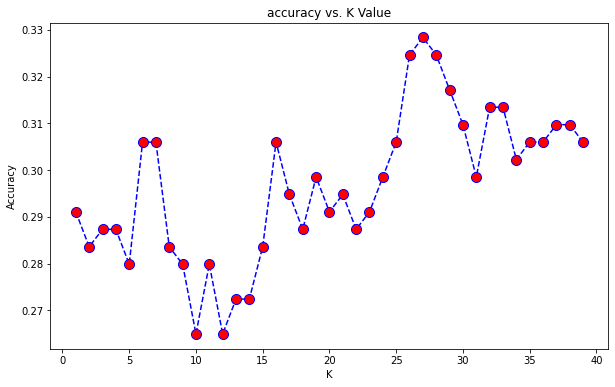

In [143]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color = 'blue',linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')

print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))

**CONCLUSION OPTIMAL K VALUE FOR THE GIVEN DATASET IS 26.**